In [1]:
! gdown --id 1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd
To: /content/Analytical_Task_2 (taxi startup).csv
100% 792k/792k [00:00<00:00, 27.1MB/s]


Ключевым аспектом заказа такси является цена. Она опирается на технологию для сбора точных данных отслеживания, чтобы можно было рассчитать справедливую цену в конце поездки. К счастью, наши пассажиры быстро сообщают нам, когда они переплачивают, и мы можем использовать эту обратную связь для улучшения нашего продукта.

Пожалуйста, проанализируйте набор данных, чтобы определить основные возможности для сокращения количества штрафов за переплату и представьте свои результаты.

То есть мы решаем задачу классификации, предсказываем будет ли переплата за поездку или нет.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ данных и обработка пропусков.

In [3]:
df = pd.read_csv('Analytical_Task_2 (taxi startup).csv')

In [4]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [5]:
df.shape

(4943, 26)

In [6]:
df.dtypes

,0
order_id_new,int64
order_try_id_new,int64
calc_created,object
metered_price,float64
upfront_price,float64
distance,int64
duration,int64
gps_confidence,int64
entered_by,object
b_state,object


In [7]:
df['overpaid_ride_ticket'].value_counts(normalize=True)

,proportion
overpaid_ride_ticket,
0,0.931823
1,0.068177


Имеет место сильный дисбаланс классов

In [8]:
df.isna().sum()

,0
order_id_new,0
order_try_id_new,0
calc_created,0
metered_price,20
upfront_price,1534
distance,0
duration,0
gps_confidence,0
entered_by,0
b_state,0


In [9]:
df['rider_app_version'] = df['rider_app_version'].fillna(df['rider_app_version'].mode()[0])

In [10]:
df['metered_price'] = df['metered_price'].fillna(df['metered_price'].median())

In [11]:
df['prediction_price_type'] = df['prediction_price_type'].fillna(df['prediction_price_type'].mode()[0])

In [12]:
df['predicted_distance'] = df['predicted_distance'].fillna(df['predicted_distance'].median())

In [13]:
df['predicted_duration'] = df['predicted_duration'].fillna(df['predicted_duration'].median())

In [14]:
df.dtypes

,0
order_id_new,int64
order_try_id_new,int64
calc_created,object
metered_price,float64
upfront_price,float64
distance,int64
duration,int64
gps_confidence,int64
entered_by,object
b_state,object


Удалим признаки device_token, change_reason_pricing, поскольку там  или все пропуски или почти все пропуски.

In [15]:
df.drop(columns=['device_token', 'change_reason_pricing'], inplace=True)

In [16]:
df.describe(include=['int64', 'float64'])

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4943.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,2184.000000
mean,2061.074449,2061.074044,7966.162490,4160.095747,9769.223144,1566.230629,0.800728,1.119361,8814.930407,1106.058669,2471.000000,1093.311349,0.560388,0.068177,-674.046703
std,1199.298429,1199.299081,15791.954058,17015.711912,10912.426401,1650.329858,0.399493,0.499611,10528.129309,804.536244,1427.065521,626.408069,0.496390,0.252075,1119.189890
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,5.390000,4.200000,3785.500000,604.000000,1.000000,1.000000,4141.000000,600.000000,1235.500000,561.500000,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,13.350000,6.600000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,1088.000000,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,10972.860000,4000.000000,11953.000000,1929.500000,1.000000,1.000000,10661.000000,1425.000000,3706.500000,1643.000000,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,2158.000000,1.000000,1.000000,49.000000


In [17]:
df[['order_id_new', 'order_try_id_new', 'ticket_id_new', 'driver_device_uid_new']].nunique()

,0
order_id_new,4166
order_try_id_new,4166
ticket_id_new,4943
driver_device_uid_new,2159


In [18]:
(df['order_id_new'] == df['order_try_id_new']).sum()

4885

In [19]:
df.groupby('gps_confidence', as_index=False)['overpaid_ride_ticket'].mean()

,gps_confidence,overpaid_ride_ticket
0,0,0.204061
1,1,0.034361


In [20]:
df.groupby('eu_indicator', as_index=False)['overpaid_ride_ticket'].mean()

,eu_indicator,overpaid_ride_ticket
0,0,0.149103
1,1,0.004693


Удалим одинаковые order id: order_id_new и	order_try_id_new. Также удалим ticket_id_new.

In [21]:
df.drop(columns=['order_id_new', 'order_try_id_new', 'ticket_id_new'], inplace=True)

In [22]:
df.describe(include=['object'])

,calc_created,entered_by,b_state,prediction_price_type,rider_app_version,order_state,order_try_state,driver_app_version,device_name
count,4943,4943,4943,4943,4943,4943,4943,4943,4943
unique,4165,3,1,4,114,2,1,33,497
top,2020-03-07 1:01:14,client,finished,upfront,CI.4.17,finished,finished,DA.4.39,TECNO MOBILE LIMITED TECNO B1p
freq,6,4722,4943,3452,739,4942,4943,1573,108


In [23]:
df['calc_created'] = pd.to_datetime(df.calc_created, format='%Y-%m-%d %H:%M:%S')

In [24]:
df['calc_created'].agg(['min','max'])

,calc_created
min,2020-02-02 00:01:16
max,2020-03-13 23:52:07


In [25]:
df['b_state'].value_counts()

,count
b_state,
finished,4943


In [26]:
df['order_try_state'].value_counts()

,count
order_try_state,
finished,4943


In [27]:
df['order_state'].value_counts()

,count
order_state,
finished,4942
active,1


Удалим константные признаки

In [28]:
df.drop(columns=['b_state', 'order_try_state', 'order_state'], inplace=True)

In [29]:
df.groupby('entered_by', as_index=False)['overpaid_ride_ticket'].mean()

,entered_by,overpaid_ride_ticket
0,client,0.071156
1,driver,0.004630
2,reseller,0.000000


In [30]:
df.groupby('prediction_price_type', as_index=False)['overpaid_ride_ticket'].mean()

,prediction_price_type,overpaid_ride_ticket
0,prediction,0.173573
1,upfront,0.032445
2,upfront_destination_changed,0.014423
3,upfront_waypoint_changed,0.000000


In [31]:
df_up = df.loc[~df['upfront_price'].isna()].copy()
df_up['upfront_price_cat'] = pd.qcut(df_up['upfront_price'], 10)
df_up.groupby('upfront_price_cat', as_index=False)['overpaid_ride_ticket'].agg('mean')

<ipython-input-31-ec441fec315f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_up.groupby('upfront_price_cat', as_index=False)['overpaid_ride_ticket'].agg('mean')


,upfront_price_cat,overpaid_ride_ticket
0,"(1.999, 3.0]",0.000000
1,"(3.0, 3.8]",0.002825
2,"(3.8, 4.6]",0.014663
3,"(4.6, 5.5]",0.000000
4,"(5.5, 6.6]",0.003226
5,"(6.6, 8.6]",0.002874
6,"(8.6, 13.8]",0.002985
7,"(13.8, 7000.0]",0.067416
8,"(7000.0, 13500.0]",0.111765
9,"(13500.0, 595000.0]",0.114907


In [32]:
df_fraud = df.loc[~df['fraud_score'].isna()].copy()
df_fraud['fraud_score_cat'] = pd.qcut(df_fraud['fraud_score'], 10)
df_fraud.groupby('fraud_score_cat', as_index=False)['overpaid_ride_ticket'].agg('mean')

<ipython-input-32-d5be70f37406>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fraud.groupby('fraud_score_cat', as_index=False)['overpaid_ride_ticket'].agg('mean')


,fraud_score_cat,overpaid_ride_ticket
0,"(-14225.001, -1800.4]",0.013699
1,"(-1800.4, -1026.0]",0.013699
2,"(-1026.0, -642.2]",0.004608
3,"(-642.2, -426.0]",0.004505
4,"(-426.0, -278.5]",0.004651
5,"(-278.5, -184.0]",0.009091
6,"(-184.0, -98.0]",0.009050
7,"(-98.0, -36.0]",0.009217
8,"(-36.0, -1.0]",0.003968
9,"(-1.0, 49.0]",0.005495


# Матрица корреляции

<Axes: >

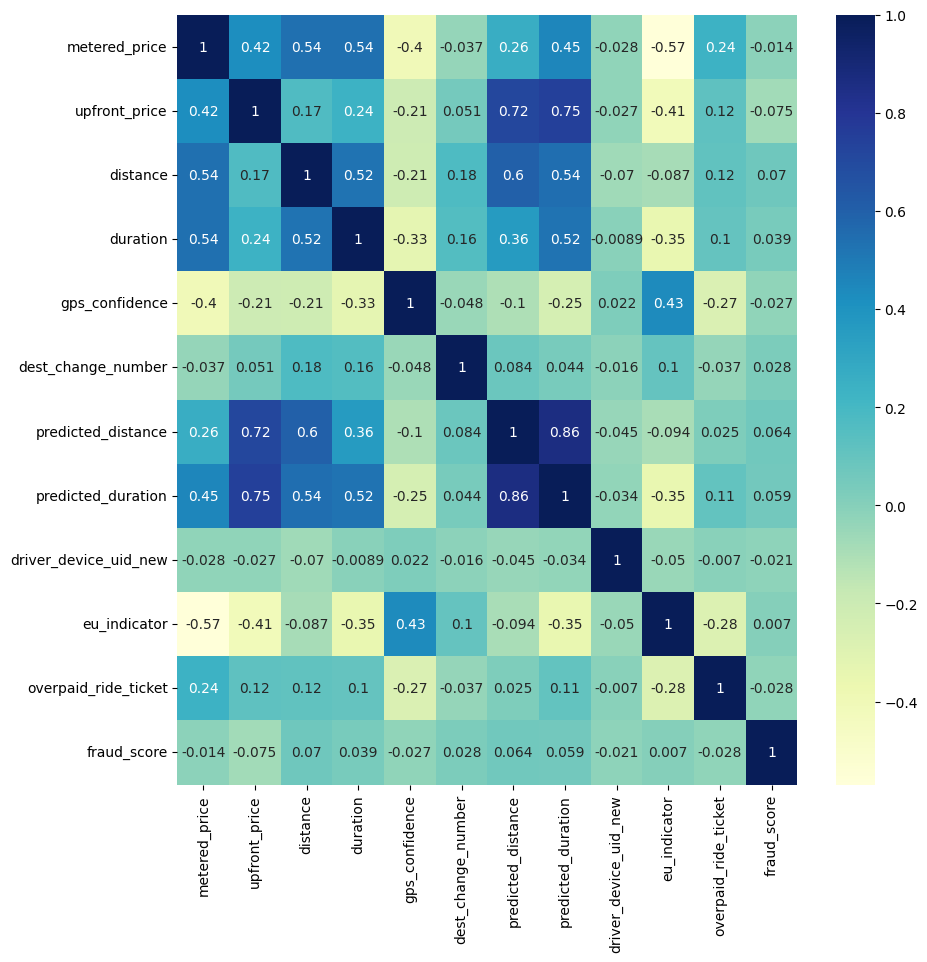

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, ax=ax)

Бороться со скореллированными признаками будем средствами самих моделей, главным образом настраивая регуляризацию(L1 регуляризацию в том числе, она может полностью исключить некоторые признаки из модели)

# Добавление признаков

In [34]:
df['change_duration'] = df['predicted_duration'] - df['duration']
df['change_distance'] = df['predicted_distance'] - df['distance']

df['month'] = df['calc_created'].dt.month
df['hour'] = df['calc_created'].dt.hour

In [35]:
def device_cat(device_name):
  if 'tecno' in device_name.lower():
    return 'tecno'
  if 'iphone' in device_name.lower():
    return 'iphone'
  if 'lg' in device_name.lower():
    return 'lg'
  if 'samsung' in device_name.lower():
    return 'samsung'
  if 'htc' in device_name.lower():
    return 'htc'
  if 'nokia' in device_name.lower():
    return 'nokia'
  if 'xiaomi'in device_name.lower():
    return 'xiaomi'
  if 'HUAWEI'.lower() in device_name.lower():
    return 'HUAWEI'.lower()
  return 'misc'

In [36]:
df['device_group'] = df['device_name'].apply(device_cat)

In [37]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
device_group,,
htc,16,0.312500
tecno,933,0.167203
nokia,158,0.113924
misc,703,0.095306
samsung,1683,0.038622
iphone,426,0.021127
huawei,724,0.019337
xiaomi,261,0.011494
lg,39,0.000000


In [38]:
df.head(5)

,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,...,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,change_duration,change_distance,month,hour,device_group
0,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,1,upfront,13384.0,...,1596,Xiaomi Redmi 6,1,0,-1383.0,391.0,10545.0,2,3,xiaomi
1,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,1,upfront,2286.0,...,1578,Samsung SM-G965F,1,0,NaN,-133.0,-3412.0,2,2,samsung
2,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,1,upfront,4101.0,...,951,Samsung SM-A530F,1,0,-166.0,-262.0,-325.0,2,11,samsung
3,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,2,upfront_destination_changed,3017.0,...,1587,TECNO-Y6,0,1,NaN,-800.0,-46731.0,2,6,tecno
4,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,1,upfront,14236.0,...,433,Itel W5504,0,0,NaN,-2289.0,3963.0,2,17,misc


In [39]:
df.drop(columns='calc_created', inplace=True)

In [40]:
df.isna().sum()

,0
metered_price,0
upfront_price,1534
distance,0
duration,0
gps_confidence,0
entered_by,0
dest_change_number,0
prediction_price_type,0
predicted_distance,0
predicted_duration,0


In [41]:
df['upfront_price'] = df['upfront_price'].fillna(df['upfront_price'].median())

In [42]:
df.drop(columns = 'fraud_score', inplace=True)

In [43]:
cat_features = [column for column in df.columns if df[f'{column}'].dtypes == 'object']
num_features = [column for column in df.columns if df[f'{column}'].dtypes != 'object']

# Борьба с дисбалансом

Будем в дальнейшем использовать модели CatBoost и XGBoost. Хоть они и не требуют нормализации, так как основаны на деревьях решений, все равно проведем ее, так как в дальнейшем будем бороться с дисбалансом классов с помощью SMOTE. SMOTE генерирует синтетические наблюдения, основываясь на принципе k ближайших соседей, а он чувствителен к масштабу данных. В нашем случае необходима нормализация, чтобы сгенерировать более релевантные синтетические данные.

In [44]:
data_numerical = df[num_features]
data_numerical.describe()

,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,change_duration,change_distance,month,hour
count,4943.000000,4943.00000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000
mean,7966.162490,2871.10880,9769.223144,1566.230629,0.800728,1.119361,8814.930407,1106.058669,1093.311349,0.560388,0.068177,-460.171960,-954.292737,2.292535,12.797491
std,15791.954058,14260.28864,10912.426401,1650.329858,0.399493,0.499611,10528.129309,804.536244,626.408069,0.496390,0.252075,1407.340873,9618.039461,0.454973,6.281961
min,2.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18086.000000,-112012.000000,2.000000,0.000000
25%,5.390000,5.10000,3785.500000,604.000000,1.000000,1.000000,4141.000000,600.000000,561.500000,0.000000,0.000000,-598.000000,-1738.500000,2.000000,8.000000
50%,13.350000,6.60000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,1088.000000,1.000000,0.000000,-130.000000,-180.000000,2.000000,14.000000
75%,10972.860000,9.80000,11953.000000,1929.500000,1.000000,1.000000,10661.000000,1425.000000,1643.000000,1.000000,0.000000,76.000000,395.000000,3.000000,18.000000
max,194483.520000,595000.00000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,2158.000000,1.000000,1.000000,20081.000000,341860.000000,3.000000,23.000000


In [45]:
data_numerical = (data_numerical - data_numerical.min(axis = 0))/(data_numerical.max(axis = 0) - data_numerical.min(axis = 0))

In [46]:
df[num_features] = data_numerical

In [47]:
df

,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,change_duration,change_distance,month,hour,device_group
0,0.000010,0.000013,0.012175,0.031247,1.0,client,0.000000,upfront,0.037857,0.051972,...,DA.4.37,0.739574,Xiaomi Redmi 6,1.0,0.0,0.484109,0.270025,0.0,0.130435,xiaomi
1,0.000021,0.000003,0.024435,0.022007,1.0,client,0.000000,upfront,0.006466,0.017149,...,DA.4.39,0.731233,Samsung SM-G965F,1.0,0.0,0.470380,0.239275,0.0,0.086957,samsung
2,0.000012,0.000003,0.018980,0.031024,1.0,client,0.000000,upfront,0.011600,0.020627,...,DA.4.37,0.440686,Samsung SM-A530F,1.0,0.0,0.467000,0.246076,0.0,0.478261,samsung
3,0.374687,0.000008,0.213337,0.062494,0.0,client,0.090909,upfront_destination_changed,0.008534,0.028582,...,DA.4.37,0.735403,TECNO-Y6,0.0,1.0,0.452904,0.143831,0.0,0.260870,tecno
4,0.102994,0.032770,0.044054,0.226185,1.0,client,0.000000,upfront,0.040267,0.132336,...,DA.4.37,0.200649,Itel W5504,0.0,0.0,0.413892,0.255524,0.0,0.739130,misc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,0.000046,0.000020,0.067207,0.064682,1.0,client,0.000000,upfront,0.045743,0.080554,...,DA.4.37,0.746988,HUAWEI LYA-L29,1.0,0.0,0.480205,0.247894,1.0,0.739130,huawei
4939,0.045183,0.000008,0.024495,0.052361,0.0,client,0.000000,prediction,0.016157,0.052067,...,DA.4.37,0.398054,Samsung SM-G928F,0.0,0.0,0.471769,0.246792,0.0,0.782609,samsung
4940,0.000028,0.000009,0.022741,0.021694,1.0,client,0.000000,upfront,0.014542,0.023723,...,DA.4.42,0.955051,HUAWEI AMN-LX9,1.0,0.0,0.474179,0.246435,1.0,1.000000,huawei
4941,0.000005,0.000010,0.015129,0.015088,1.0,client,0.000000,upfront,0.023033,0.036585,...,DA.4.39,0.973587,TP-Link Neffos X1,1.0,0.0,0.485131,0.256960,1.0,0.869565,misc


In [48]:
X = df.drop(columns = 'overpaid_ride_ticket')
y = df['overpaid_ride_ticket'].round()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
y_train.value_counts(normalize=True)

,proportion
overpaid_ride_ticket,
0.0,0.932473
1.0,0.067527


Для борьбы с дисбалансом классов используем SMOTE.

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC


smote = SMOTENC(k_neighbors=3, sampling_strategy=0.35, categorical_features=cat_features, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
X_resampled.shape

(4977, 20)

In [53]:
X_test.shape

(989, 20)

In [54]:
y_resampled.value_counts(normalize=True)

,proportion
overpaid_ride_ticket,
0.0,0.740808
1.0,0.259192


 # XGBoost

In [55]:
!pip install catboost lightgbm optuna -q

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import optuna

from catboost import CatBoostClassifier, Pool
import xgboost as xgb
from xgboost import DMatrix, train

In [57]:
X_train_xgb = X_resampled.copy()
X_test_xgb = X_test.copy()
le = LabelEncoder()

for col in cat_features:
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])

for col in cat_features:
    X_test_xgb[col] = le.fit_transform(X_test_xgb[col])

for c in cat_features:
    X_train_xgb[c] = X_train_xgb[c].astype('category')
    X_test_xgb[c] = X_test_xgb[c].astype('category')

Параметры для моделей будем подбирать с помощью фреймворка Optuna.

In [60]:
def objective_xgb(trial):
  params = {
      "seed" : 42,
      "lambda": trial.suggest_int('lambda', 1, 10.0),
      "alpha": trial.suggest_int('alpha', 1, 10.0),
      "subsample": trial.suggest_float('subsample', 0.1, 1.0),
      "colsample_bytree": trial.suggest_float('colsample_bytree', 0.1, 1.0)
  }

  model = xgb.XGBClassifier(**params, enable_categorical=True)
  model.fit(X_train_xgb, y_resampled)

  pred_model = model.predict_proba(X_test_xgb)[:,1]
  score = roc_auc_score(y_test, pred_model)
  return score

In [61]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective_xgb, n_trials = 50)

[I 2024-10-31 21:34:22,085] A new study created in memory with name: no-name-570b561b-67d3-40d6-af0d-c8ea166ff2a0
[I 2024-10-31 21:34:25,141] Trial 0 finished with value: 0.83964713197575 and parameters: {'lambda': 9, 'alpha': 6, 'subsample': 0.3259699267508982, 'colsample_bytree': 0.48881165873577115}. Best is trial 0 with value: 0.83964713197575.
[I 2024-10-31 21:34:27,072] Trial 1 finished with value: 0.8460671537385357 and parameters: {'lambda': 2, 'alpha': 8, 'subsample': 0.5099093275046768, 'colsample_bytree': 0.8903032503518925}. Best is trial 1 with value: 0.8460671537385357.
[I 2024-10-31 21:34:29,162] Trial 2 finished with value: 0.8306000310896937 and parameters: {'lambda': 4, 'alpha': 4, 'subsample': 0.23752200169620363, 'colsample_bytree': 0.356676298442995}. Best is trial 1 with value: 0.8460671537385357.
[I 2024-10-31 21:34:30,712] Trial 3 finished with value: 0.8357920099487021 and parameters: {'lambda': 5, 'alpha': 6, 'subsample': 0.2400882482456779, 'colsample_bytree'

In [62]:
study.best_params

{'lambda': 3,
 'alpha': 7,
 'subsample': 0.9471825358356505,
 'colsample_bytree': 0.7437814604586772}

In [63]:
params = study.best_params

In [64]:
model = xgb.XGBClassifier(**params, enable_categorical=True)
model.fit(X_train_xgb, y_resampled)

XGBClassifier(alpha=7, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7437814604586772, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=3, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [65]:
pred_model = model.predict_proba(X_test_xgb)[:,1]
score = roc_auc_score(y_test, pred_model)
print(score)

0.8624980568941396


# Catboost

In [68]:
train_set = Pool(X_resampled, y_resampled, cat_features=cat_features)
eval_set = Pool(X_test, y_test, cat_features=cat_features)

In [78]:
def objective_catboost(trial):
    params = {
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    model = CatBoostClassifier(**params, iterations=1000, random_state=42, eval_metric='AUC', verbose=0)
    model.fit(train_set, eval_set=eval_set, early_stopping_rounds=100)

    model_pred = model.predict_proba(eval_set)[:, 1]
    return roc_auc_score(y_test, model_pred)

In [79]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective_catboost, n_trials = 50)

[I 2024-10-31 21:59:22,330] A new study created in memory with name: no-name-c0054a6b-8b0e-4996-bd7c-a8c9dbcc98a5
[I 2024-10-31 21:59:28,044] Trial 0 finished with value: 0.839460593813151 and parameters: {'colsample_bylevel': 0.041528223538417945, 'depth': 4, 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.839460593813151.
[I 2024-10-31 21:59:30,542] Trial 1 finished with value: 0.8416213275299238 and parameters: {'colsample_bylevel': 0.039295791743000415, 'depth': 7, 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.8416213275299238.
[I 2024-10-31 21:59:31,673] Trial 2 finished with value: 0.8235038084874864 and parameters: {'colsample_bylevel': 0.0155405771573944, 'depth': 11, 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.8416213275299238.
[I 2024-10-31 21:59:34,028] Trial 3 finished with value: 0.8328540338877662 and parameters: {'colsample_bylevel': 0.06289475512745672, 'depth': 1, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.2184124833404344}. Be

In [80]:
params = study.best_params

In [81]:
model = CatBoostClassifier(**params, iterations=1000, random_state=42, eval_metric='AUC')
model.fit(train_set, eval_set=eval_set, early_stopping_rounds=100)

Learning rate set to 0.047104
0:	test: 0.5000000	best: 0.5000000 (0)	total: 3.09ms	remaining: 3.09s
1:	test: 0.7113166	best: 0.7113166 (1)	total: 7.13ms	remaining: 3.56s
2:	test: 0.7674802	best: 0.7674802 (2)	total: 11.2ms	remaining: 3.72s
3:	test: 0.8229209	best: 0.8229209 (3)	total: 20.2ms	remaining: 5.04s
4:	test: 0.8259754	best: 0.8259754 (4)	total: 26.9ms	remaining: 5.35s
5:	test: 0.8342453	best: 0.8342453 (5)	total: 31.6ms	remaining: 5.24s
6:	test: 0.8330483	best: 0.8342453 (5)	total: 36.6ms	remaining: 5.19s
7:	test: 0.8308410	best: 0.8342453 (5)	total: 42.1ms	remaining: 5.22s
8:	test: 0.8280507	best: 0.8342453 (5)	total: 46.4ms	remaining: 5.11s
9:	test: 0.8320146	best: 0.8342453 (5)	total: 62.3ms	remaining: 6.17s
10:	test: 0.8320146	best: 0.8342453 (5)	total: 65.7ms	remaining: 5.91s
11:	test: 0.8321467	best: 0.8342453 (5)	total: 69.6ms	remaining: 5.73s
12:	test: 0.8341987	best: 0.8342453 (5)	total: 75ms	remaining: 5.7s
13:	test: 0.8374009	best: 0.8374009 (13)	total: 87.9ms	remai

In [82]:
pred_model = model.predict_proba(eval_set)[:,1]
score = roc_auc_score(y_test, pred_model)
print(score)

0.8600886056272345


# Вывод

Лучшее значение ROC-AUC показал XGBoost. XGBoost сам по себе очень регуляризованный бустинг и показывает хорошие результаты, в даннном случае у XGBoost мы подбирали параметры alpha и lambda, отвечающие за регуляризацию, что скорее всего привело к более высокому показателю AUC.